In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\project\Student-Performance-System-Using-Mlops\notebooks\archive\Student_performance_data _.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
df.shape

(2392, 15)

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [7]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [ ]:
df[['ParentalEducation', 'Ethnicity', 'ParentalSupport']].head()

,ParentalEducation,Ethnicity,ParentalSupport
0,2,0,2
1,1,0,1
2,3,2,2
3,3,0,3
4,2,0,3


TARGET FEATURE ANALYSIS

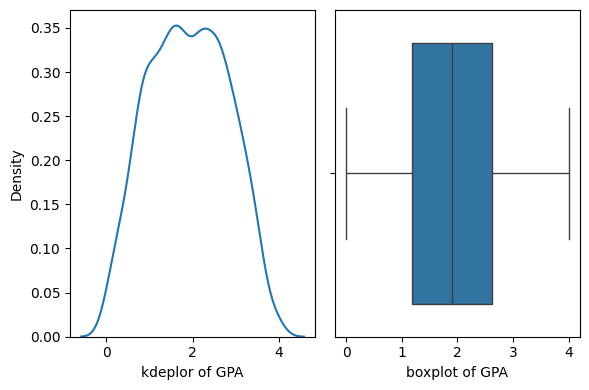

In [15]:
target = df['GPA']

fig, axes = plt.subplots(1, 2, figsize=(6, 4))
axes = axes.flatten()

sns.kdeplot(x=target, ax=axes[0])
axes[0].set_xlabel(f"kdeplor of GPA")
sns.boxplot(x=target, ax=axes[1])
axes[1].set_xlabel("boxplot of GPA")

plt.tight_layout()
plt.show()

CATEGORICAL DATA ANALYSIS

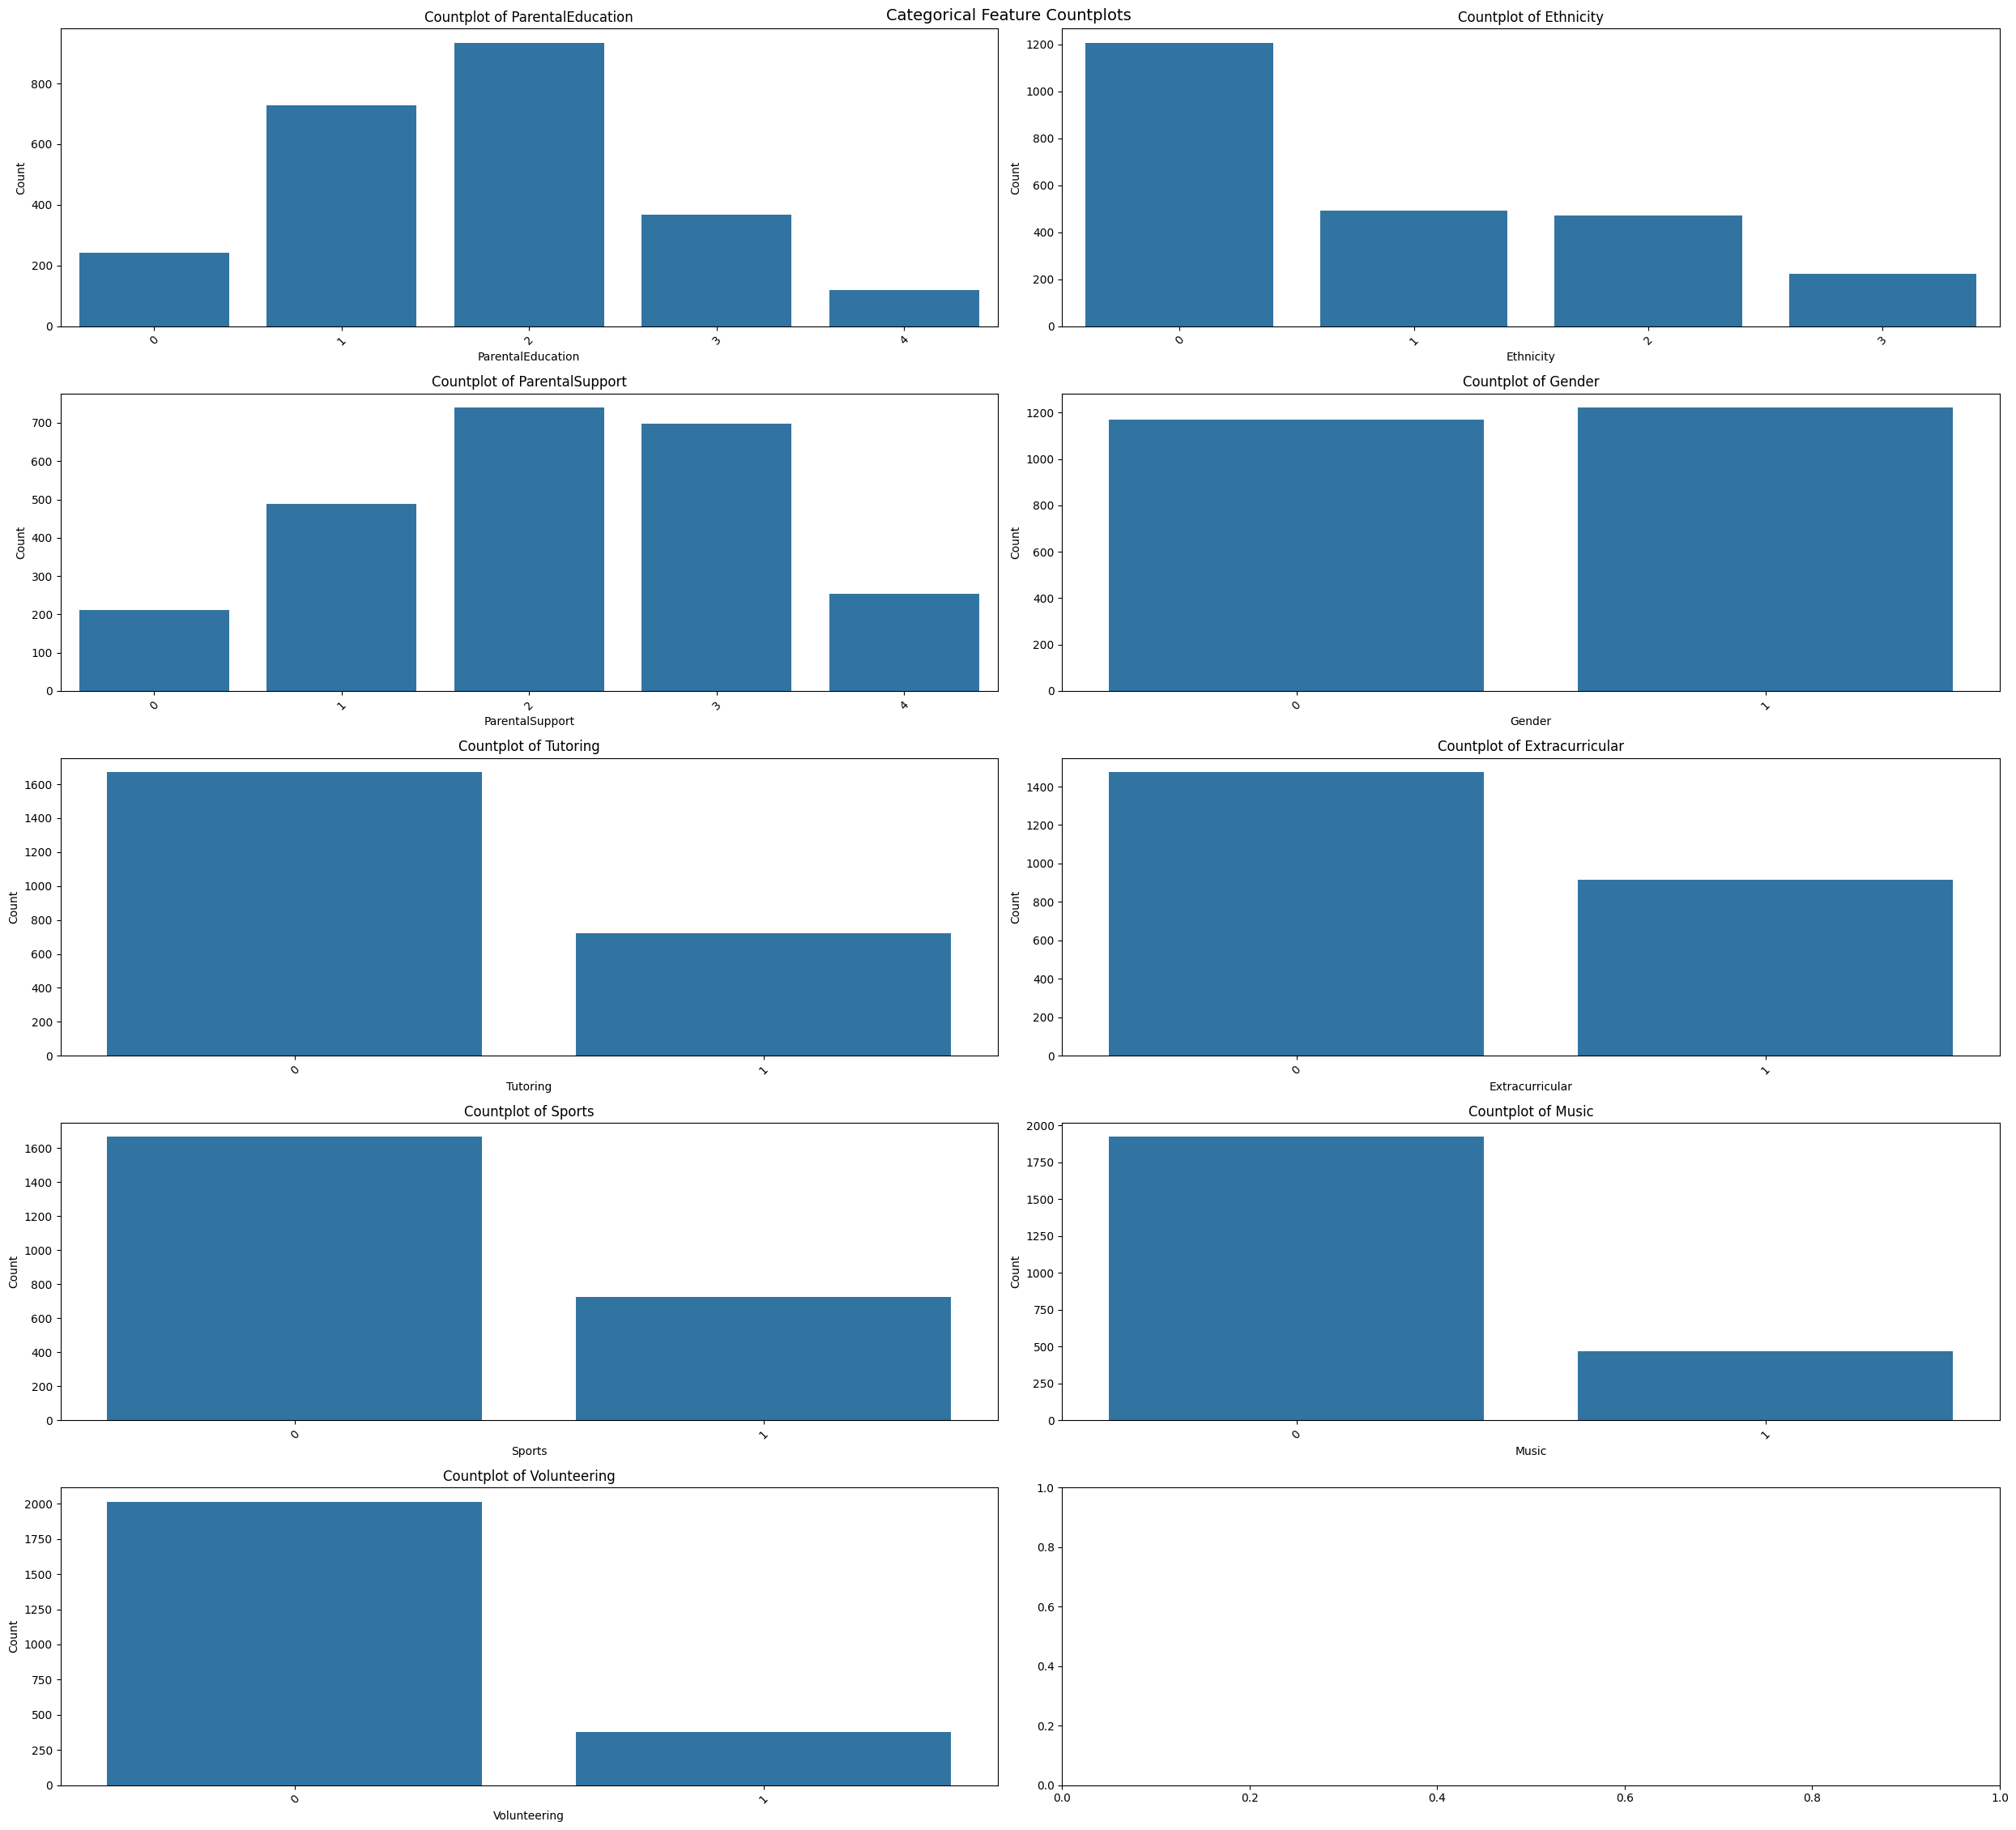

In [27]:
cat = ['ParentalEducation', 'Ethnicity', 'ParentalSupport', 'Gender', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

fig, axes = plt.subplots(5, 2, figsize=(25, 23))
axes = axes.flatten()

for idx, feature in enumerate(cat):
    sns.countplot(x=df[feature], ax=axes[idx])
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Count")
    axes[idx].set_title(f"Countplot of {feature}")
    axes[idx].tick_params(axis='x', rotation=45)

fig.suptitle("Categorical Feature Countplots", fontsize=14)
plt.tight_layout()
plt.show()

In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import f_oneway

anova_results = {}

for feature in df[cat]:
    # Split GPA by each category level
    groups = [df.loc[df[feature] == level, 'GPA'] for level in df[feature].unique()]
    
    # Perform one-way ANOVA
    f_stat, p_val = f_oneway(*groups)
    if p_val < 0.05:
        anova_results[feature] = {'F-Statistic': f_stat, 'p-value': p_val, 'Significance':"significant"}
    else:
        anova_results[feature] = {'F-Statistic': f_stat, 'p-value': p_val,'Significance':"not significant"}
        
    

# Display results
anova_df = pd.DataFrame(anova_results).T
print("ANOVA test results (categorical features vs numeric target):")
print(anova_df)

ANOVA test results (categorical features vs numeric target):
                  F-Statistic   p-value     Significance
ParentalEducation     1.80813  0.124484  not significant
Ethnicity            0.958122  0.411585  not significant
ParentalSupport     22.723458       0.0      significant
Gender               0.426665  0.513693  not significant
Tutoring            51.414981       0.0      significant
Extracurricular     21.342139  0.000004      significant
Sports               8.027815  0.004645      significant
Music               12.916947  0.000332      significant
Volunteering         0.025368  0.873468  not significant


NUMERICAL ANALYSIS

In [ ]:
# remove student id
df.drop('StudentID', axis=1, inplace=True)

Numerical columns:
['Age', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']
len of the num columns: 10


In [30]:
num = df.drop(columns=cat).columns.to_list()
print(f"Numerical columns:\n{num}")
print(f"len of the num columns: {len(num)}")

Numerical columns:
['Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'GradeClass']
len of the num columns: 5


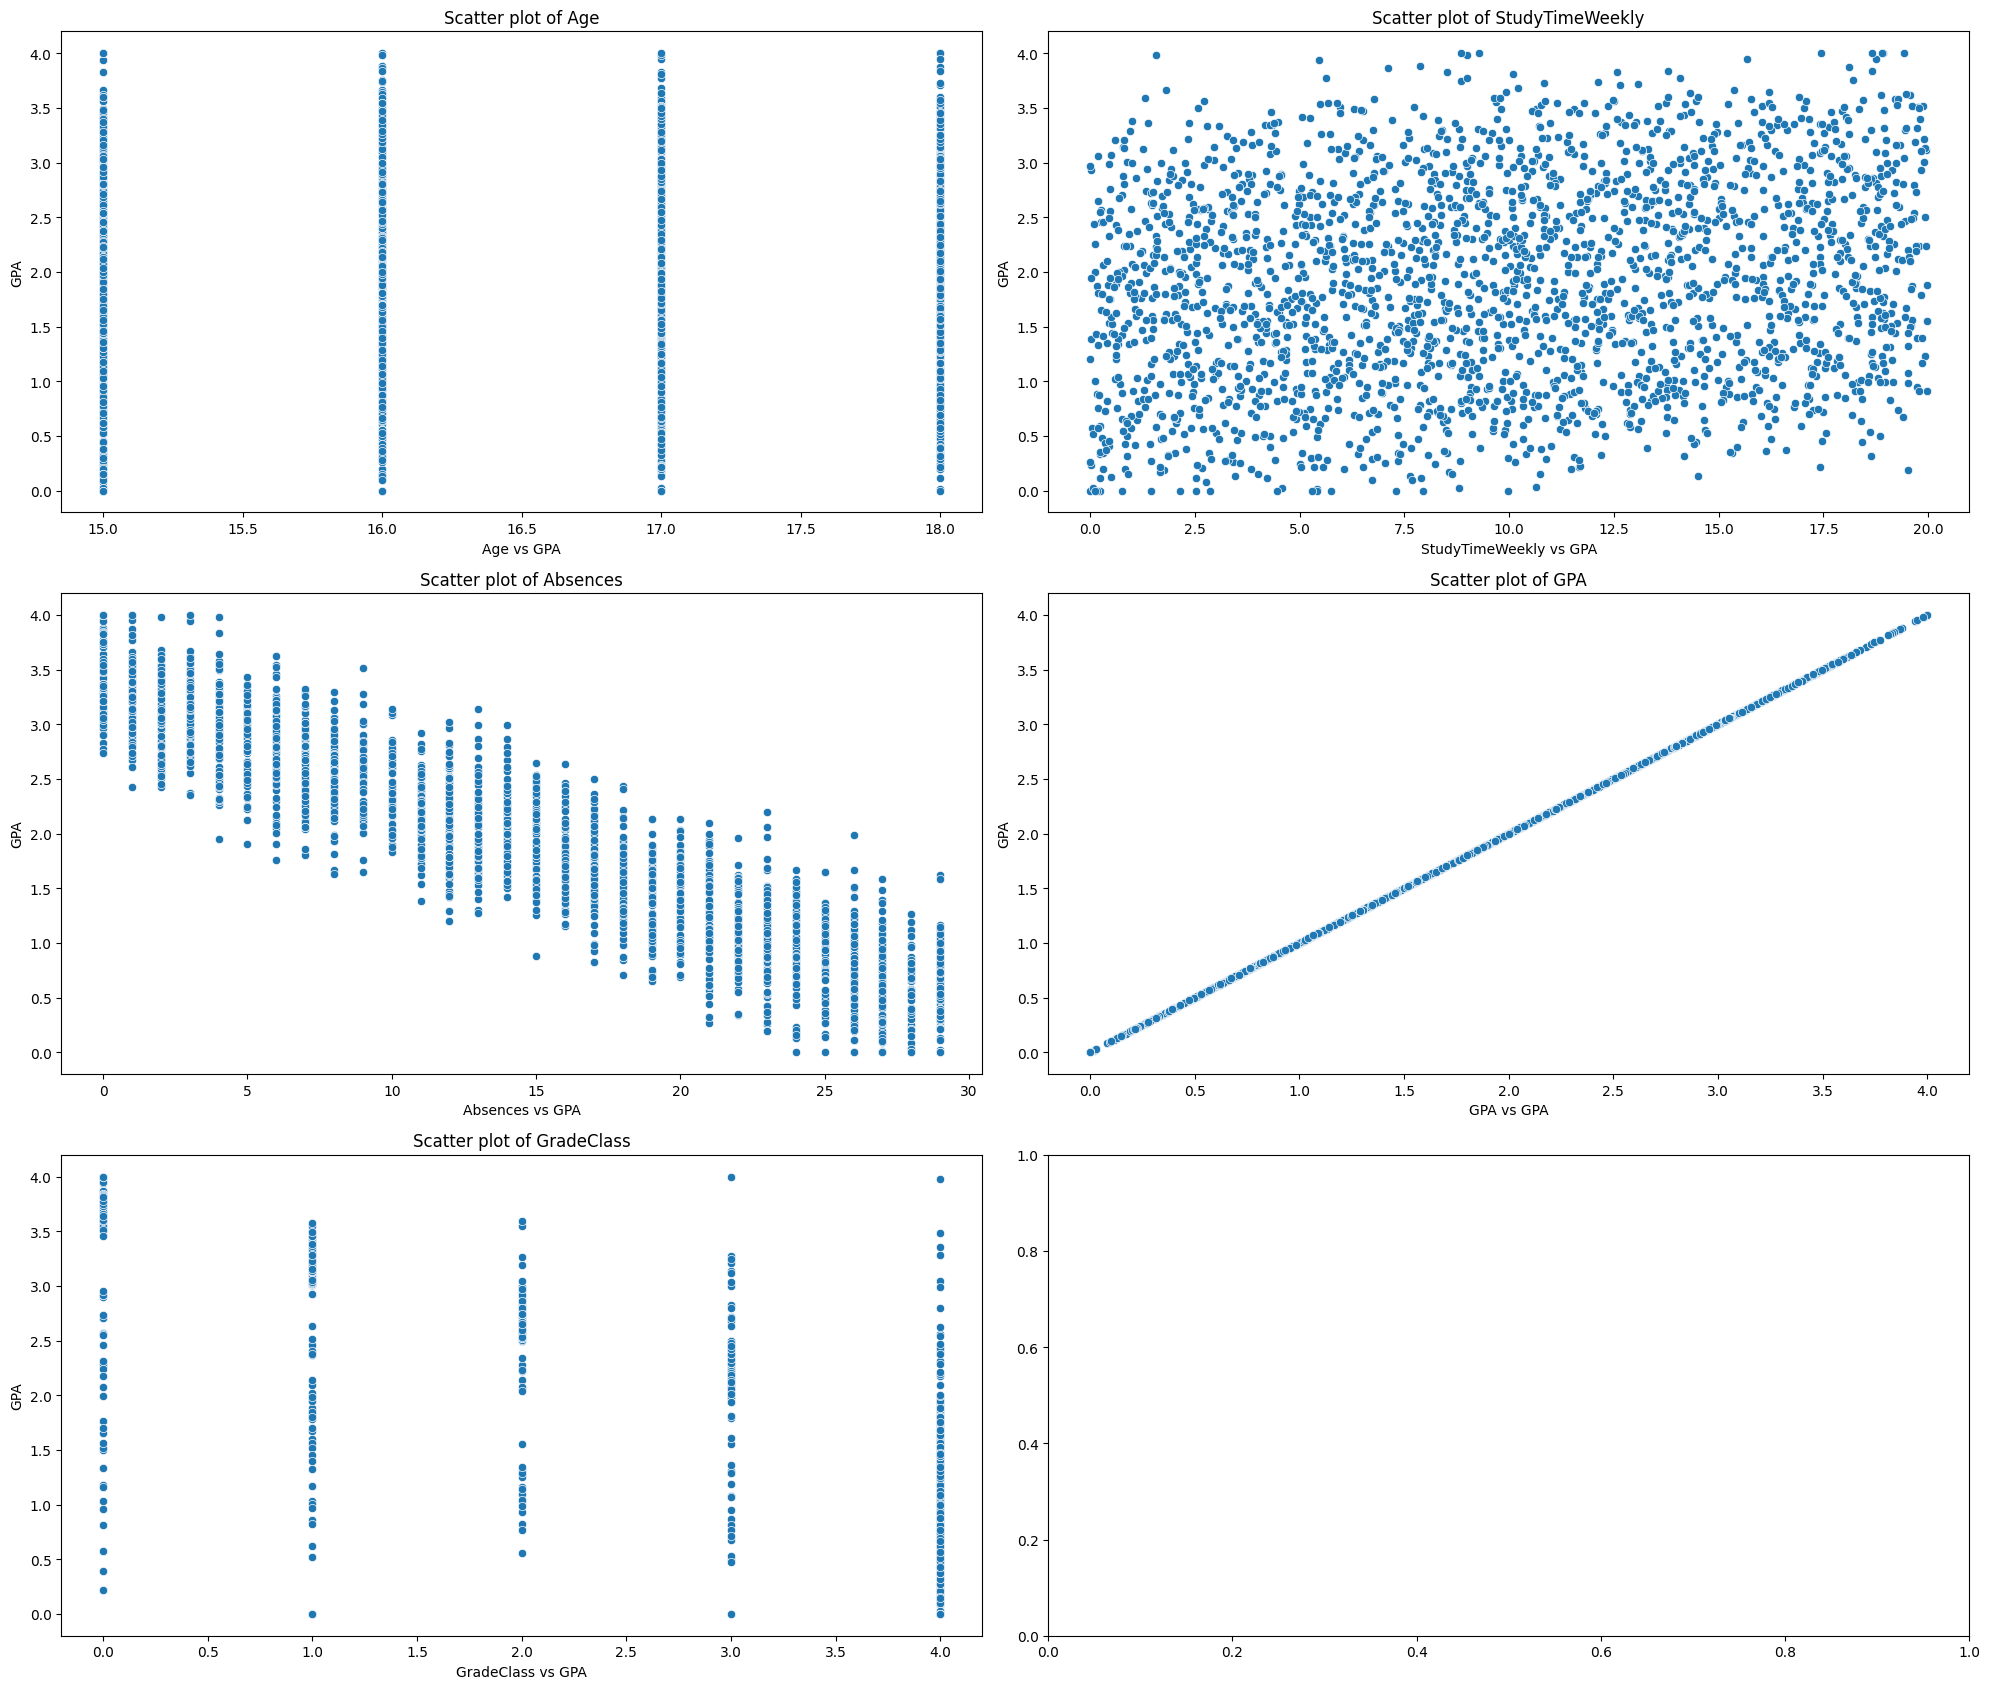

In [31]:
# Scatter Plot
fig, axes = plt.subplots(3, 2, figsize=(20, 17))

axes = axes.flatten()
for idx, feature in enumerate(num):
    sns.scatterplot(x=df[feature], y=df['GPA'], ax=axes[idx])
    axes[idx].set_xlabel(f"{feature} vs GPA")
    axes[idx].set_title(f"Scatter plot of {feature}")
    
plt.tight_layout()
plt.show()